In [1]:
# -*- coding: utf8

from scipy import stats as ss

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Para evitar a confusão da aula passada, colocando alguns defaults!
plt.rcParams['figure.figsize']  = (18, 10)
plt.rcParams['axes.labelsize']  = 20
plt.rcParams['axes.titlesize']  = 20
plt.rcParams['legend.fontsize'] = 20
plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['ytick.labelsize'] = 20
plt.rcParams['lines.linewidth'] = 4

In [2]:
plt.ion()
plt.style.use('seaborn-colorblind')
plt.rcParams['figure.figsize']  = (12, 8)

In [3]:
def despine(ax=None):
    if ax is None:
        ax = plt.gca()
    # Hide the right and top spines
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

    # Only show ticks on the left and bottom spines
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')

# Aula 12 - Poder de um Teste

## Introdução

Neste notebook vamos entender um pouco sobre o poder de um teste. Para isto, vamos relembrar do caso mais simples de moedas viesadas e não viesadas. Em particular, vamos assumir um lançamento de 100 moedas. Vamos contar quantas vezes as mesmas caem em cara.

Como já falamos, tais dados podem ser modelados por uma Binomial. Sendo $p$ a proporção de caras e $n$ o número de vezes que lanço a moeda:

$$k \sim Binomial(p, n)$$

Ou seja, podemos amostrar o número de caras $k$ usando uma Binomial.

In [4]:
N = 100
alpha = 0.05

Usando o código da Binomial em Python, temos várias funções que nos ajuda. Uma delas define qual é o intervalo onde caem 95% dos lançamentos. Então, esta é a faixa esperada de uma moeda não viesada ($p=.5$).

In [5]:
lower, upper = ss.binom.interval(1 - alpha, N, 0.5)
(lower, upper)

(40.0, 60.0)

Abaixo vemos alguns plots:
1. 95% dos casos na região verde
1. 5% na vermelha

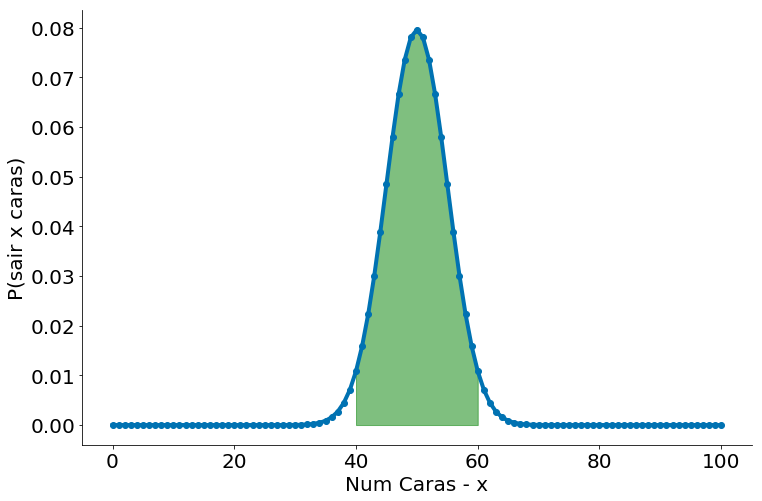

In [6]:
x = np.arange(0, 101) # Valores no eixo x
prob_binom = ss.distributions.binom.pmf(x, N, 0.5)
plt.plot(x, prob_binom, 'o-')
plt.xlabel('Num Caras - x')
plt.ylabel('P(sair x caras)')

x2 = np.arange(40, 61) # Valores no eixo x
prob_binom = ss.distributions.binom.pmf(x2, N, 0.5)
plt.fill_between(x2, prob_binom, color='g', alpha=0.5)

despine()

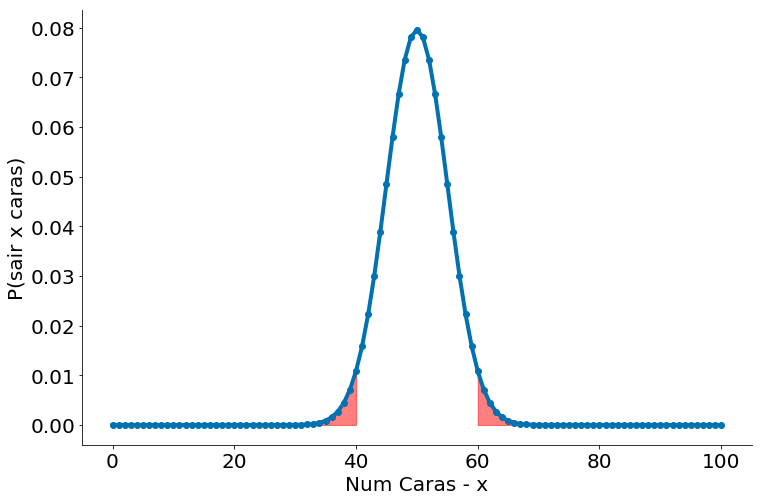

In [7]:
x = np.arange(0, 101) # Valores no eixo x
prob_binom = ss.distributions.binom.pmf(x, N, 0.5)
plt.plot(x, prob_binom, 'o-')
plt.xlabel('Num Caras - x')
plt.ylabel('P(sair x caras)')

x2 = np.arange(60, 100) # Valores no eixo x
prob_binom = ss.distributions.binom.pmf(x2, N, 0.5)
plt.fill_between(x2, prob_binom, color='r', alpha=0.5)

x3 = np.arange(0, 41) # Valores no eixo x
prob_binom = ss.distributions.binom.pmf(x3, N, 0.5)
plt.fill_between(x3, prob_binom, color='r', alpha=0.5)

despine()

## Tipos de Erros

Vamos agora definir nossa hipótese nula:

$H_0$: **p == 0.5**

Ao realizar um experimento, lançar algumas moedas para cima, caso eu rejeite $H_0$ tenho evidência de que a moeda não é justa (não-viesada). Precisamos tomar uma decisão sobre a *significância*, que mede o quanto estamos dispostos a cometer um *erro do tipo 1* (“falso positivo”), no qual rejeitamos $H_0$, embora ela seja verdade.Vamos escolher $5\%$ (ver slides sobre a discussão de Fisher).

Considere o teste que rejeita $H_0$ se $X$ estiver fora dos limites dados por: (40, 60). Ver plots acima. Para entender um erro do tipo 1, considere a figura abaixo que compara noessa moeda com outra onde $p=0.6$. A região rosa consiste de mais ou menos $50%$ dos casos desta moeda. Note que tais casos todos caem no intervalo de $2.5\%$ (para a direita, maior, metade de $5\%$). Podemos errar, mas esperamos bem mais vezes $50\%$ de que a moeda injusta caia no intervalo. 

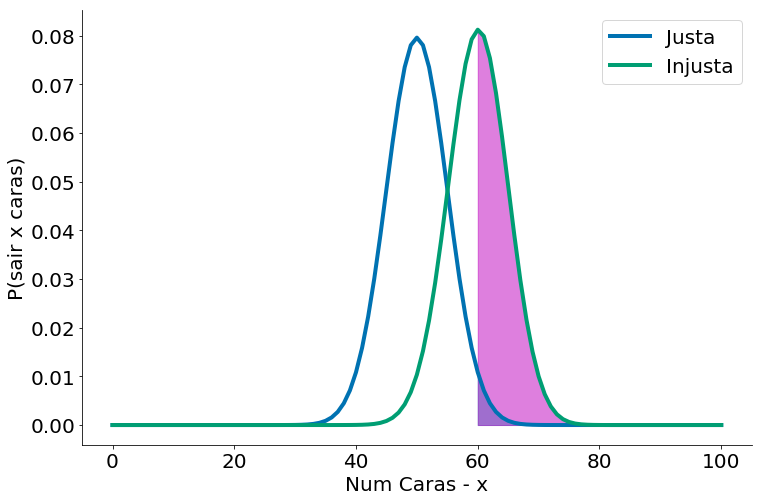

In [8]:
x = np.arange(0, 101) # Valores no eixo x
prob_binom_fair = ss.distributions.binom.pmf(x, N, 0.5)
prob_binom_unfair = ss.distributions.binom.pmf(x, N, 0.6)
plt.plot(x, prob_binom_fair, label='Justa')
plt.plot(x, prob_binom_unfair, label='Injusta')
plt.xlabel('Num Caras - x')
plt.ylabel('P(sair x caras)')

x2 = np.arange(60, 100) # Valores no eixo x
fill_prob_binom_fair = ss.distributions.binom.pmf(x2, N, 0.5)
plt.fill_between(x2, fill_prob_binom_fair, color='c', alpha=0.5)

fill_prob_binom_unfair = ss.distributions.binom.pmf(x2, N, 0.6)
plt.fill_between(x2, fill_prob_binom_unfair, color='m', alpha=0.5)

plt.legend()
despine()

Portanto, assumindo que $p$ é realmente igual a $0.5$ (ou seja, $H_0$ é verdade), há apenas $5\%$ de chance de observarmos um $X$ que está fora desse intervalo, que é o significado exato que queríamos. Dito de forma diferente, se $H_0$ for verdadeiro, então, aproximadamente $19$ vezes de $20$ este teste dará o resultado correto.

Também estamos frequentemente interessados no *poder* (ou *power*) de um teste, que é a probabilidade de não cometer um *erro do tipo 2*, em que não podemos rejeitar $H_0$, mesmo ela sendo falsa. Para medir isso, temos que especificar o que é exatamente $H_0$ ser falsa. (Saber apenas que $p$ não é $0.5$ não fornece muitas informações sobre a distribuição de $X$.) Em particular, vamos verificar o que acontece se $p$ for, na verdade, $0.06$, de modo que a moeda seja ligeiramente tendenciosa a dar "cara". Nesse caso, gostaríamos de rejeitar $H_0$.

Tal erro, capturado $\beta$, pode ser ilustrado na região onde a moeda viesada cai no intervalo (40, 60). Aqui, uma moeda viesada parece justa!

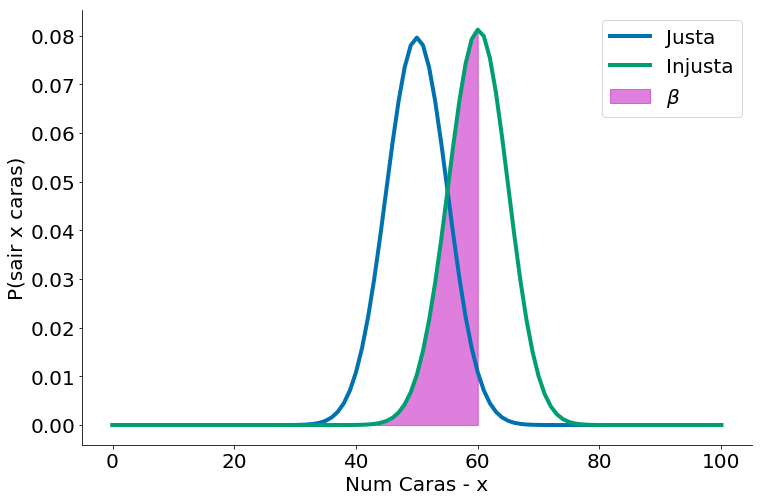

In [9]:
x = np.arange(0, 101) # Valores no eixo x
prob_binom_fair = ss.distributions.binom.pmf(x, N, 0.5)
prob_binom_unfair = ss.distributions.binom.pmf(x, N, 0.6)
plt.plot(x, prob_binom_fair, label='Justa')
plt.plot(x, prob_binom_unfair, label='Injusta')
plt.xlabel('Num Caras - x')
plt.ylabel('P(sair x caras)')

x2 = np.arange(40, 61) # Valores no eixo x
fill_prob_binom_unfair = ss.distributions.binom.pmf(x2, N, 0.6)
plt.fill_between(x2, fill_prob_binom_unfair, color='m', alpha=0.5, label=r'$\beta$')

plt.legend()
despine()

Usando a CDF, poemos ver tais chances.! Em particular queremos:

$P(X <= 60) - P(x <= 40)$

In [10]:
beta = ss.binom.cdf(upper, N, 0.6) - ss.binom.cdf(lower, N, 0.6)
beta

0.53788219272697868

x = np.arange(0, 101) # Valores no eixo x
y = ss.binom.cdf(x, N, 0.6)
plt.plot(x, y)
plt.xlabel('Num Caras - x')
plt.ylabel('P(X < x)')

x2 = np.arange(40, 61) # Valores no eixo x
fill = ss.binom.cdf(x2, N, 0.6)
plt.fill_between(x2, fill, color='m', alpha=0.5, label=r'$\beta$')

O poder é dado por 1-$\beta$.

In [11]:
1 - beta

0.46211780727302132

As análises acima indicam que, quando a moeda for tendenciosa com 𝑝=0.6, 53% das vezes a variável 𝑋 terá um valor dentro do intervalo [40,60]. Em outras palavras, o nosso teste vai rejeitar 𝐻0 corretamente quando 𝑝=0.6.

Observe que o valor de $\beta$ é bem menor (quase zero) quando uma moeda é muito viesada. Outra forma de ver é que temos muito poder $1-\beta$.

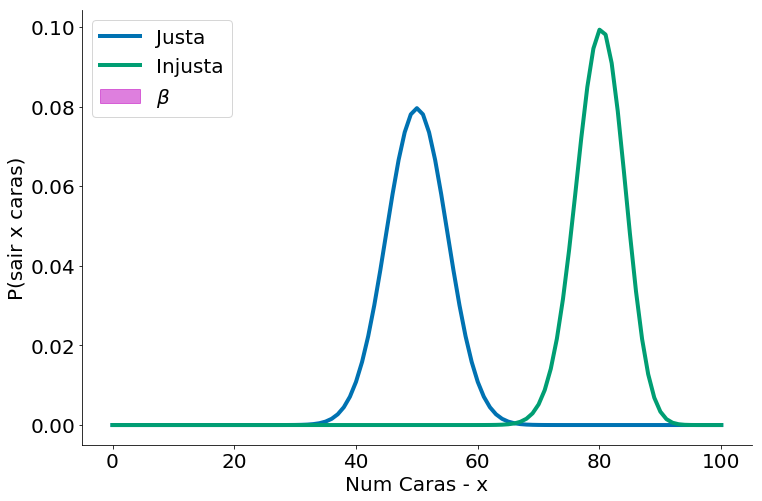

In [12]:
x = np.arange(0, 101) # Valores no eixo x
prob_binom_fair = ss.distributions.binom.pmf(x, N, 0.5)
prob_binom_unfair = ss.distributions.binom.pmf(x, N, 0.8)
plt.plot(x, prob_binom_fair, label='Justa')
plt.plot(x, prob_binom_unfair, label='Injusta')
plt.xlabel('Num Caras - x')
plt.ylabel('P(sair x caras)')

x2 = np.arange(40, 61) # Valores no eixo x
fill_prob_binom_unfair = ss.distributions.binom.pmf(x2, N, 0.8)
plt.fill_between(x2, fill_prob_binom_unfair, color='m', alpha=0.5, label=r'$\beta$')

plt.legend()
despine()

Definindo uma função power (abaixo), podemos agora explorar melhor o poder para diferentes moedas viesadas.

In [13]:
def power(alt, n):
    lower, upper = ss.binom.interval(1 - 0.05, n, 0.5)
    beta = ss.binom.cdf(upper, n, alt) - ss.binom.cdf(lower, n, alt)
    return 1 - beta

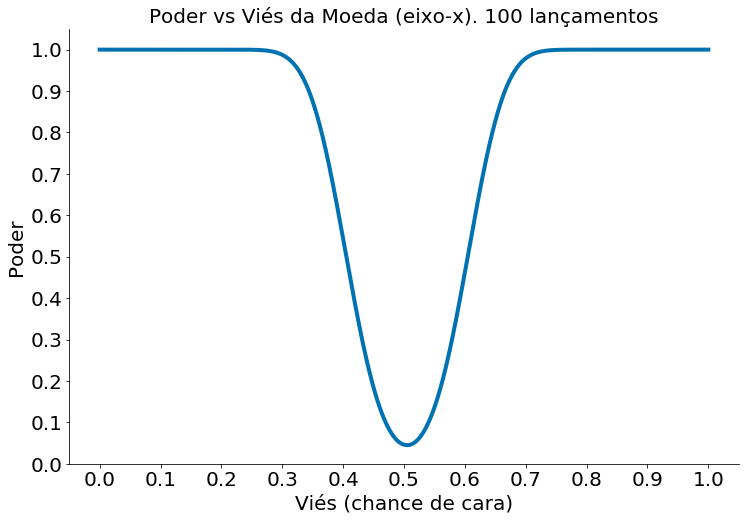

In [14]:
fig, ax = plt.subplots(1, 1)
ax.set_title('Poder vs Viés da Moeda (eixo-x). 100 lançamentos')

def plot_power(n, ax, **kwargs):
    alternativas = np.linspace(0, 1, 1000)
    ax.plot(alternativas, power(alternativas, n), **kwargs)
    ax.set_xticks(np.arange(0,1.1, 0.1))
    ax.set_yticks(np.arange(0,1.1, 0.1))
    ax.set_ybound((0, 1.05))
    ax.set_ylabel('Poder')
    ax.set_xlabel('Viés (chance de cara)')
    
plot_power(N, ax)
despine()

Como esperado, temos muito mais poder quando estamos mais longe de $p=0.5$. Isto é o nosso efeito. Ao sumarizar um teste de hipóteses, é bom ver qual é a distância entre o observado e o esperado (no modelo nulo). Posso dizer chegar em conclusões erradas para uma moeda onde $p=0.51$. 

Um outro fator importante é que quanto maior nossos dados mais poder. Ou seja, mais chances de dizer $p=0.51$ é viesado. Porém qual o efeito prático disto? Moedas não viesadas existem apenas na teoria.

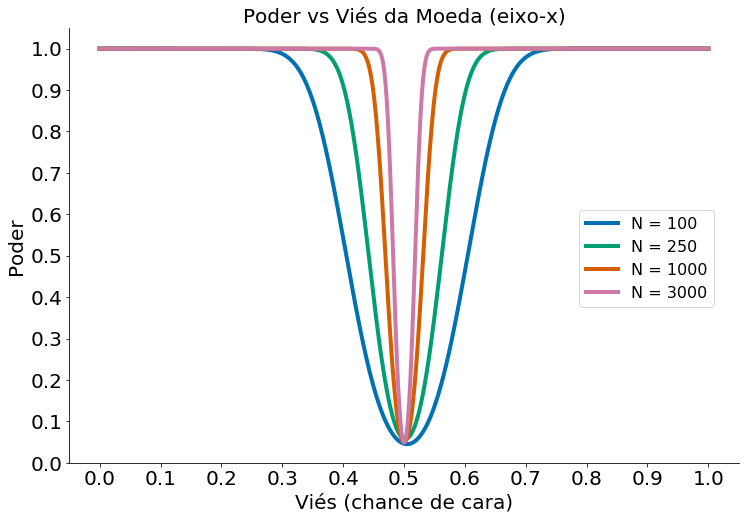

In [15]:
fig, ax = plt.subplots(1, 1)

def plot_powers(ax):
    ax.set_title('Poder vs Viés da Moeda (eixo-x)')
    plot_power(100, ax,  label="N = 100")
    plot_power(250, ax,  label="N = 250")
    plot_power(1000, ax, label="N = 1000")
    plot_power(3000, ax, label="N = 3000")
    ax.legend(bbox_to_anchor=(0.75, 0.6), loc=2, prop={'size':16})
    
plot_powers(ax)
despine()

Podemos ver como mais dados aumenta o poder. Compare o caso abaixo com o caso com 100 lançamentos!

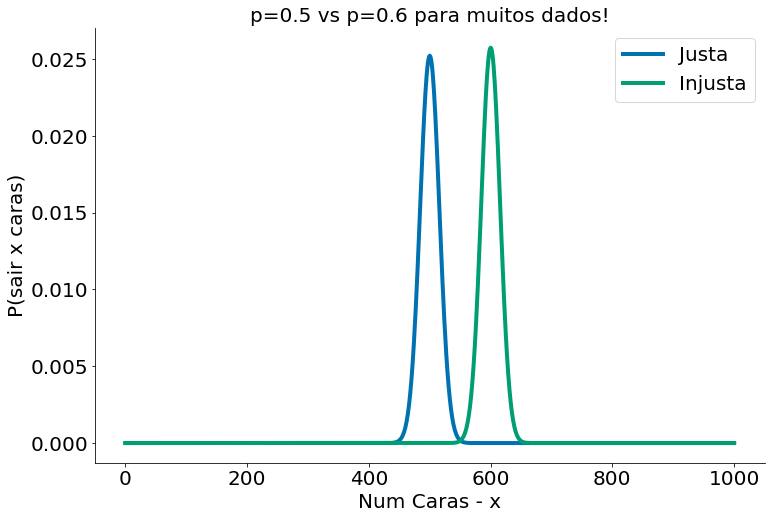

In [16]:
x = np.arange(0, 1001) # Valores no eixo x
prob_binom_fair = ss.distributions.binom.pmf(x, 1000, 0.5)
prob_binom_unfair = ss.distributions.binom.pmf(x, 1000, 0.6)
plt.plot(x, prob_binom_fair, label='Justa')
plt.plot(x, prob_binom_unfair, label='Injusta')
plt.xlabel('Num Caras - x')
plt.ylabel('P(sair x caras)')

plt.title('p=0.5 vs p=0.6 para muitos dados!')
plt.legend()
despine()

## Dicas

Ao realizar um teste sempre indique:
1. A hipótese nula
1. Qual o tamanho da amostra
1. Qual o tamanho do efeito

Com muitas amostras, até efeitos pequenos são significativos. Porém, sem muitas consequências na prática!

## Para maior exploração

* O Coursera oferece um [curso de Análise de Dados e Inferência Estatística](https://www.coursera.org/specializations/statistics) que abrange muitos desses tópicos.
* O All of Statistics aborda tal problema com mais detalhes teóricos.